In [16]:
import skimage
from skimage.transform import resize
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.filters import laplace
%matplotlib inline

In [2]:
coins = skimage.data.coins().copy()

In [3]:
type(coins)

numpy.ndarray

In [4]:
coins.max(), coins.min()

(252, 1)

In [5]:
coins.shape

(303, 384)

In [6]:
coins.dtype

dtype('uint8')

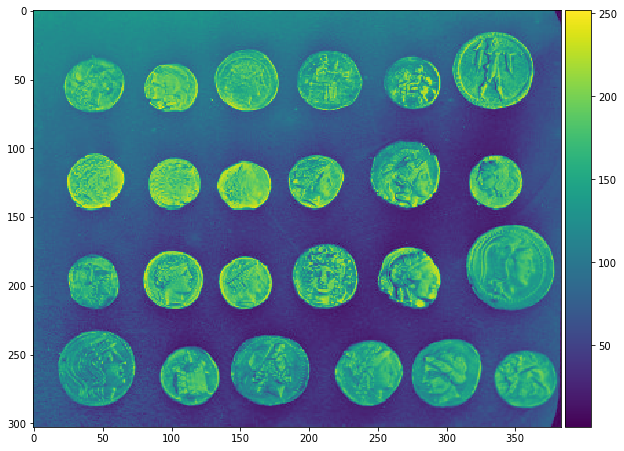

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(coins,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [20]:
height, width = coins.shape
print("height: ", height, "width: ", width, "type: ", type(coins))

height:  303 width:  384 type:  <class 'numpy.ndarray'>


In [21]:
smallCoins = resize(coins, (round(height/2), round(width/2)))*255

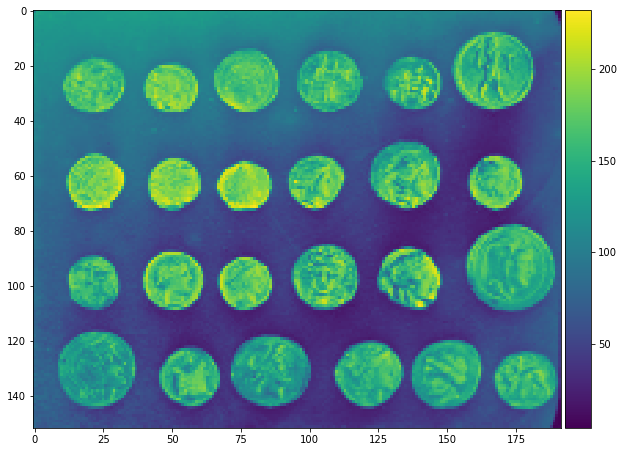

In [22]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(smallCoins,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [24]:
smallCoins.shape

(152, 192)

In [25]:
blurryCoins = resize(smallCoins, (height, width))

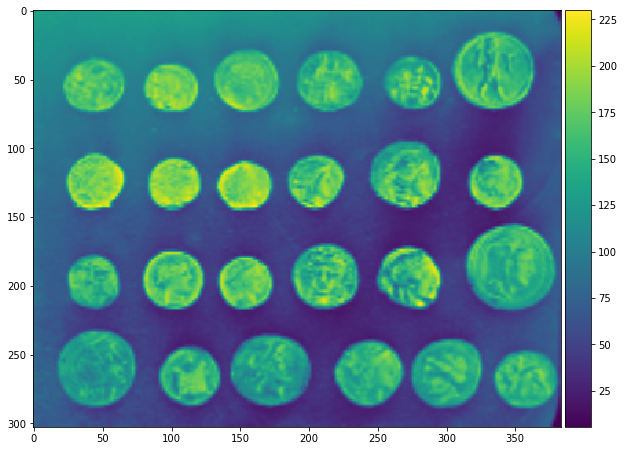

In [26]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(blurryCoins,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [27]:
details = coins - blurryCoins

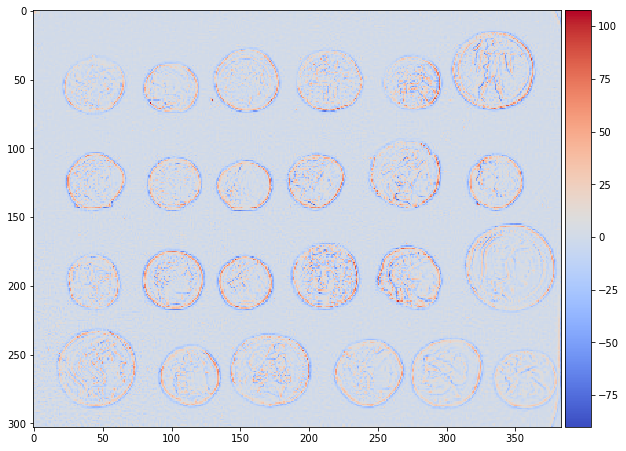

In [28]:

fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(details,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)


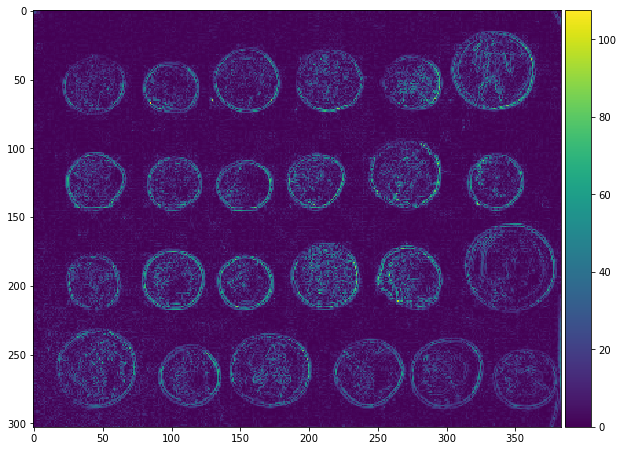

In [45]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(details),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [31]:
laplace_edges = laplace(blurryCoins)

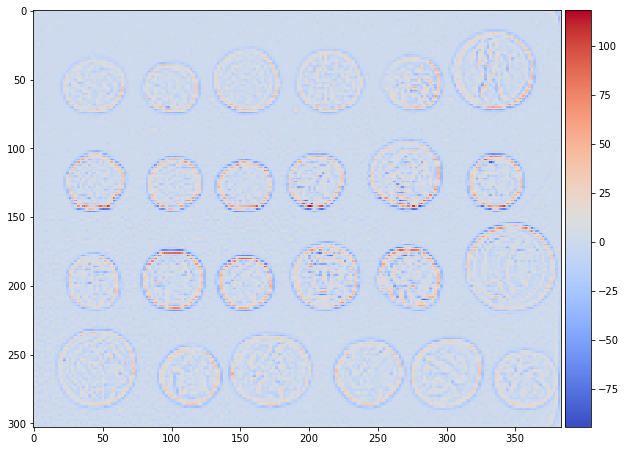

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(laplace_edges,cmap=plt.get_cmap('coolwarm'),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

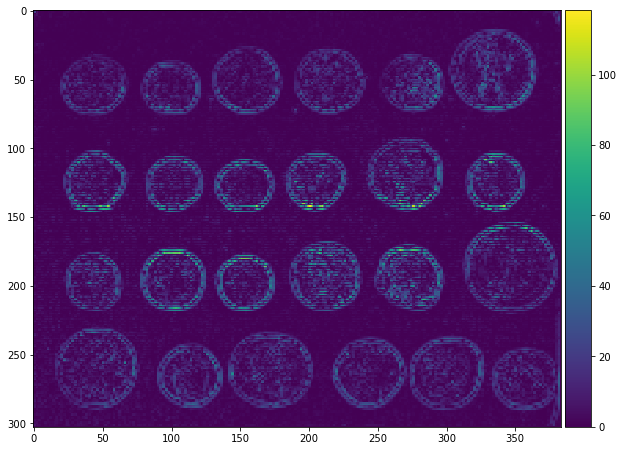

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs(laplace_edges),interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

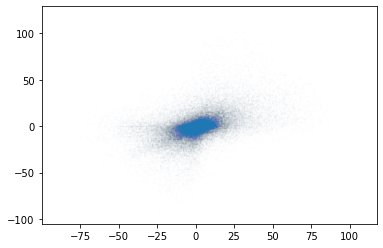

In [34]:
fig, ax = plt.subplots(1,1)
im=ax.scatter(details,laplace_edges, alpha=0.01,s=0.5)

In [35]:
sharped_image = blurryCoins+laplace_edges

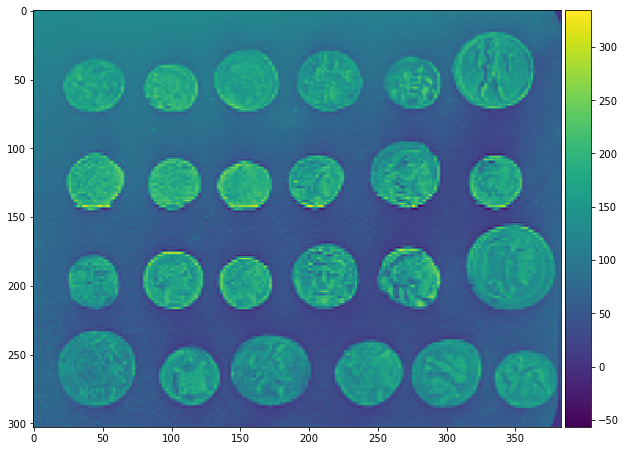

In [37]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(sharped_image,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [39]:
abs_error = abs(coins-sharped_image)

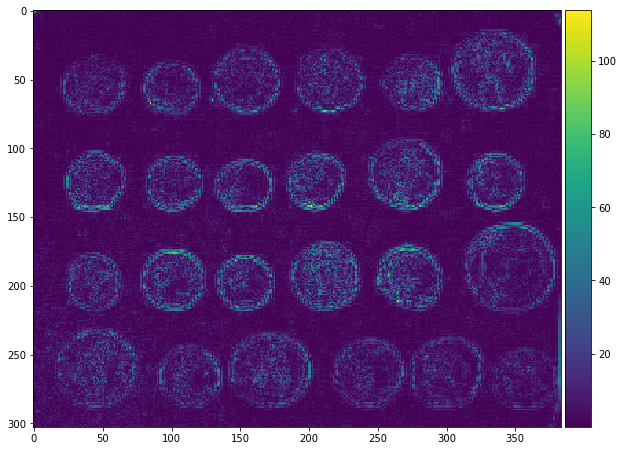

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10,15))
im = ax.imshow(abs_error,interpolation='nearest')

# This is the only way to keep the colorsize from going nuts
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_ = plt.colorbar(im, cax=cax)

In [41]:
abs_error.max(), abs_error.mean(), abs_error.std()

(113.85698253212632, 6.562580182823205, 9.566423043308095)

In [42]:
abs(details- laplace_edges).max(), abs(details- laplace_edges).mean()

(113.85698253212632, 6.562580182823205)

In [43]:
np.sqrt(((details- laplace_edges)**2).mean())

11.601030493000179